<a href="https://colab.research.google.com/github/yashtambee/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🏦Yes Bank Stock Closing Price Prediction**





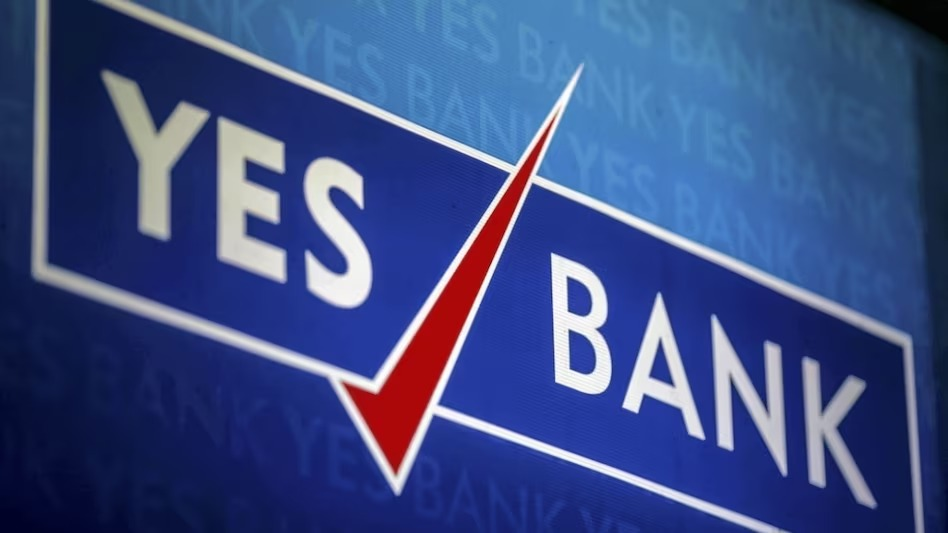

##### **Project Type**    - **Regression**
##### **Contribution**    - **Team**
##### **Team Member 1 - Yash Tambe**
##### **Team Member 2 - Chaitanya Chaudhari**


# **Project Summary -**

**The topic we have selected is Yes Bank Closing Price prediction from the year 2005 to 2020. The moto of choosing this topic is to predict the approximate Closing Price points of the Yes Bank based on the Open , High , Low values where investors can square off their positions to get as much profit and get out of trade easily by having target price points in their analysis. In this data we have 185 observations categorized into 4 features. In the process of predicting the Closing Price of Yes Bank stock, we did some of the predictions using Regression ML models. Likewise we have done their cross validation & hyperparameter tuning respectively to make the result more accurate and reduce the error. And from it we got our best probable Closing Price of the Yes Bank stock on monthly basis.**

# **GitHub Link -**

https://github.com/yashtambee/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.**

**Closing price generally refers to the last price at which a stock trades during a regular trading session. Accurate prediction of stock market closing price is a very challenging task due to volatile and non-linear nature of the financial stock markets.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime


from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'In the given dataset,\nThe total number of rows are {df.shape[0]} and \nThe total number of columns are {df.shape[1]}')

In the given dataset,
The total number of rows are 185 and 
The total number of columns are 5


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Open - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

High - The high is the highest price at which a stock traded during a period.

Low -The low is the lowest price at which a stock traded during a period.

Close -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session.











## ***3. Data Wrangling***

Checking the **Null Values**

In [ ]:
# Checking the Null Values 
df.isna().sum() 

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

The given dataset has no null values to drop  

Checking the **Duplicate Rows**

In [ ]:
len(df[df.duplicated()])

0

The dataset has no duplicate rows too 

### Converting the object format of the Date feature into datetime

In [ ]:
# converting the 'Date' feature object type to Datetime type
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


## ***4. EDA***

### Checking the Dependent variable (Close) price distribution


Text(0.5, 1.0, 'Distribution of dependent variable : Close')

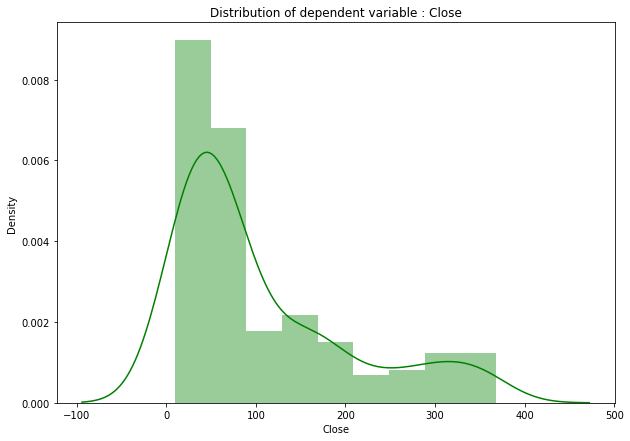

In [ ]:
# Dependent variable price distribution plot to understand its distribution
plt.rcParams['figure.figsize'] = (10,7)
sns.distplot(df['Close'],color = 'green')
plt.title('Distribution of dependent variable : Close' )

From the distribution plot we got above, we can examine that it is **highly left skewed** so for normalizing or making it normally distributed we have to perform **Log10 transformation** on the Dependent Variable.

Text(0.5, 1.0, 'Distribution of dependent variable : Close')

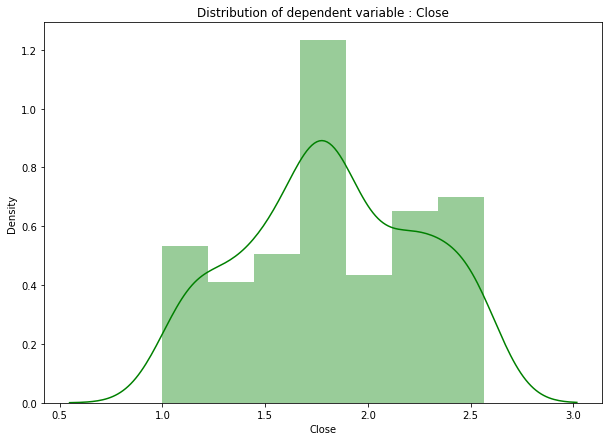

In [ ]:
# now apply the log transformation
plt.rcParams['figure.figsize'] = (10,7)
sns.distplot(np.log10(df['Close']),color = 'green')
plt.title('Distribution of dependent variable : Close' )

After performing the Log10 transformation on the Close column now we can identify that our data is Normalized

### Now checking distribution for numeric Independent variables

In [ ]:
# Creating list of Numeric feature
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

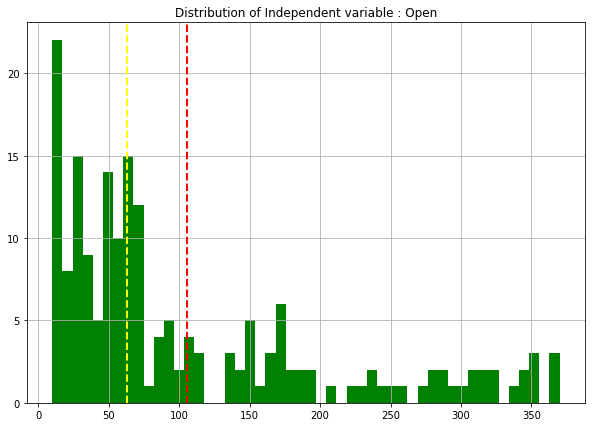

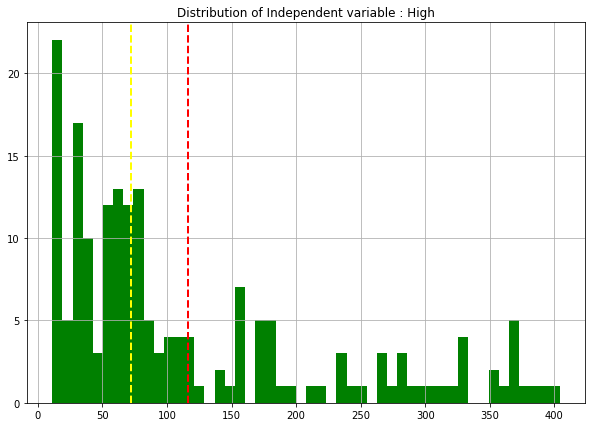

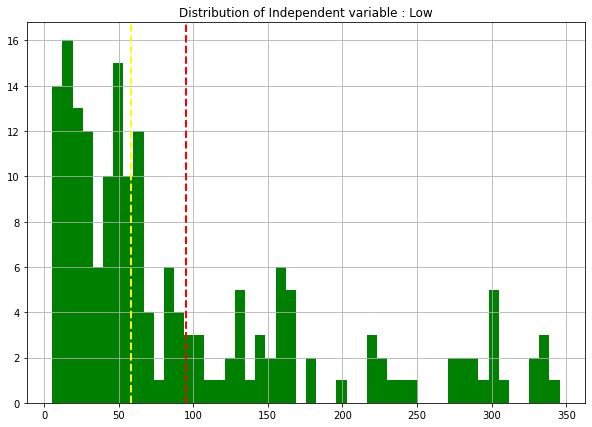

In [ ]:
#  now checking skewness of all numeric dependent features
for i in numeric_features[:-1] : 
  # we have to exclude the Close(dependent variable) column
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = df[i]
    feature.hist(bins=50, ax = ax, color = 'green')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of Independent variable :' + ' ' + i)
plt.show()

From the above plotted graph for independent variables we can say that the data is highly left skewed. So we have to again perform log10 transformation on the independent features

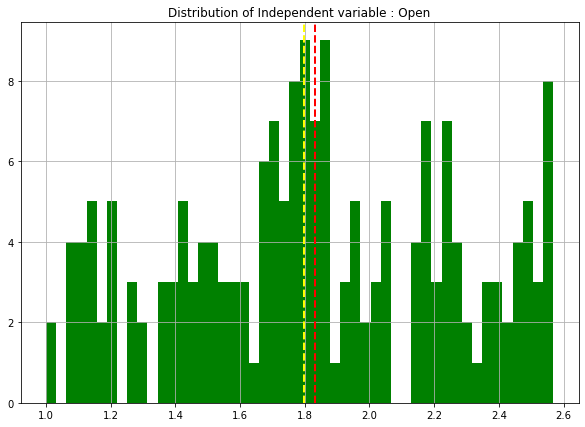

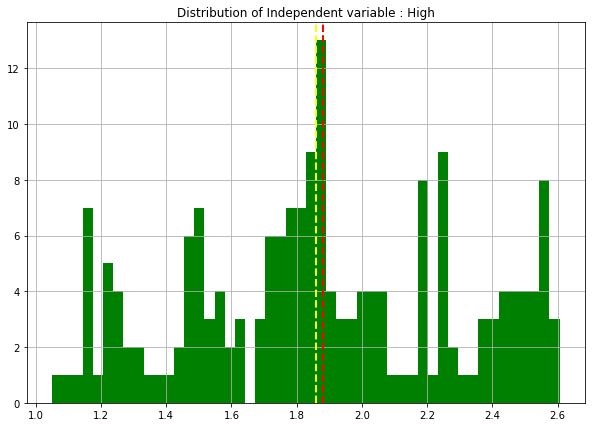

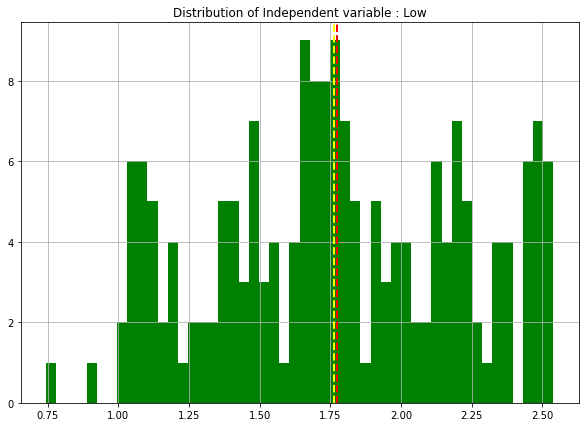

In [ ]:
for i in numeric_features[:-1] : 
  # we have to exclude the Close(dependent variable) columns
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = np.log10(df[i])
    feature.hist(bins=50, ax = ax, color = 'green')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of Independent variable :' + ' ' + i)
plt.show()

After performing the Log10 transformations on the independent numeric feature , now our data is normalized and ready for further processings


### Checking Linear Relationship between dependent and independent variable


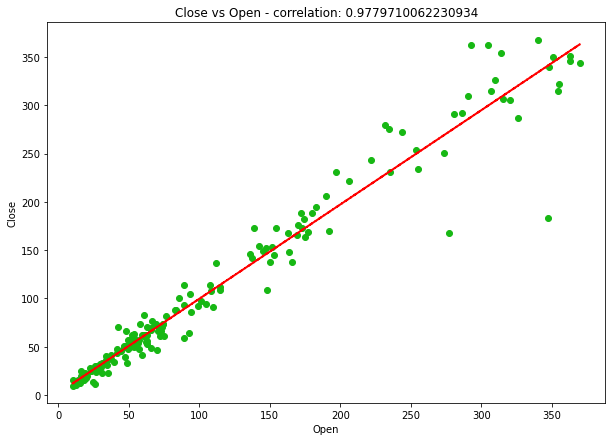

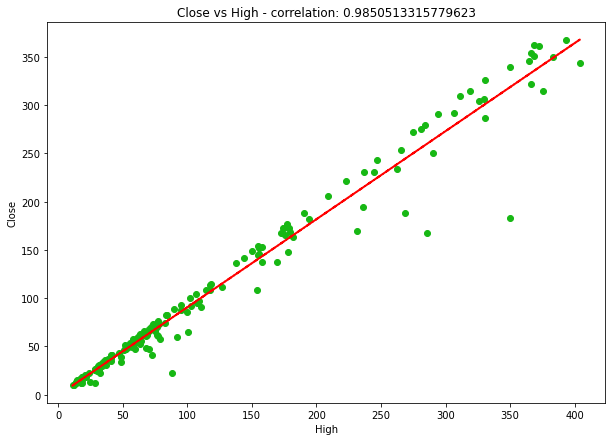

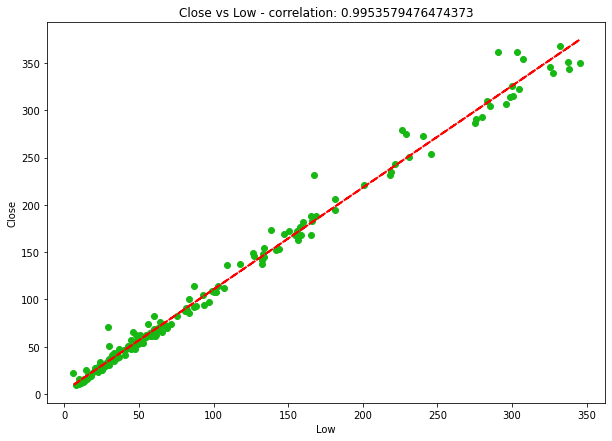

In [ ]:
for i in numeric_features[:-1]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()   # this will help in plotting title 
    feature = df[i]                     # Independent variables
    label = df['Close']                 # dependent variable
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='#17b814')
    plt.xlabel(i)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + i + ' ' + '- correlation: ' + str(correlation))
    z = np.polyfit(df[i], df['Close'], 1) # fits parameters for making linear equation of degree 1 
    y_hat = np.poly1d(z)(df[i])           # y = mx + c    

    plt.plot(df[i], y_hat, "r--", lw=2)  # lw = linewidth , r-- = redline

plt.show()

From the above scatter plot and the regression function line plot we can assume that all our independent variables('Open','High','Low') are exhibiting linear relationship with the dependent variable('Close').

As we can see the regression line is passing through maximum number of observation and also the observations are highly densed around the regression line 

So it seems like our data is case of optimal fit 

### Checking Collinearity between variables


<AxesSubplot:>

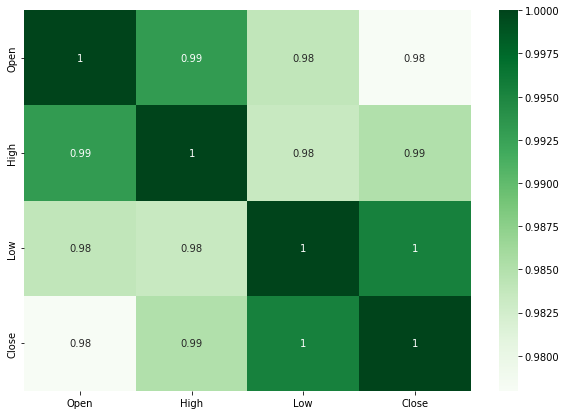

In [ ]:
sns.heatmap(abs(df.corr()),annot = True,cmap="Greens") #abs gives correlation in [0,1]

From the above plot we can identify that all variables are showing the high correlation among each other .

Also the Independent variables are having high correlations between them which can affect the output predictions of dependent variables in negative way which we are not expecting to happen

So now to take care of the high collinearity we have to perform VIF(variance_inflation_factor) analysis on the dataset



### VIF (Variance Inflation Factor) Analysis of Independent Variables


**Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables.





In [ ]:
# defining a function to calculate the VIF 
def cal_vif(x) :
# calculating vif
  vif = pd.DataFrame()
  vif['variables'] = x.columns # rows will be column of the passed dataset
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])] # df.shape[1] means shape of the columns
                                                                                  
  return(vif) # returning vif df

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]]) # It does not makes any sense to include 'Date' column
                                                                             # And the 'Close' is the dependent variable | so we will exclude both of them 

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


From the above VIF table we can say that

The Open and High has very high same variance inflation factor also the open and high has correaltion of 0.99 which is very high

Now ,

correlation of Open & Close = 0.98

correlation of High & Close = 0.99

so we can drop the Open from the VIF variables list

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Open']]]) # dropping 'Open' too from VIF variable list

,variables,VIF
0,High,62.598129
1,Low,62.598129


Now here even though the VIF are too high but we can't procced further to eliminate columns to reduce the VIF because the High & Low plays very important in deciding the Monthly Price Range & Closing price of the Yes_bank_stock 

<AxesSubplot:>

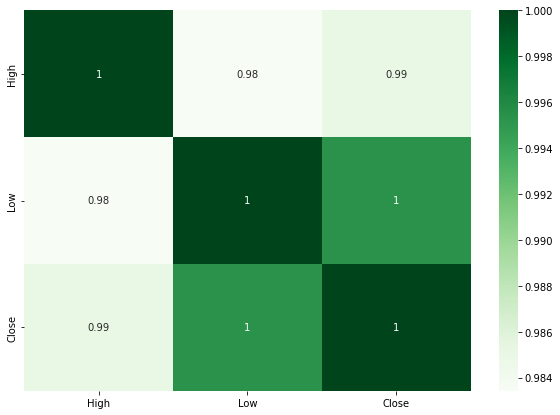

In [ ]:
# now checking the Multicollinearity again after removing the ['Date','Open','Close'] columns from the VIF

sns.heatmap(abs(df[['High','Low','Close']].corr()),annot = True,cmap="Greens") 

### Plotting Box plot to check the outliers

<AxesSubplot:>

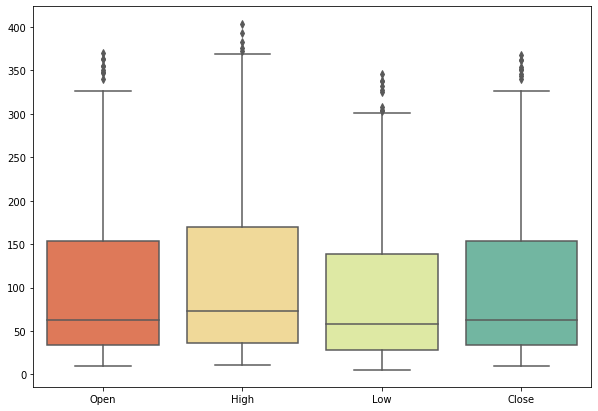

In [ ]:
# outliers with price of independent variables
# cause outlers can effect the regression line
plt.rcParams['figure.figsize'] = (10,7)
sns.boxplot(data = df,palette="Spectral")

## ***5. Train Test Split***

### Applying z score

In [ ]:
# creating a copy of data frame df
df_cp = df.copy()

In [ ]:
X = df_cp[df_cp.describe().columns[:-1]].apply(zscore)
y = np.log10(df_cp['Close'])

Our data preprocessing is done.

Now we can use this data to build predictive ML models 

### Train Test Split

In [ ]:
# splitting the dataset into 80(training) - 20(testing) ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (148, 3)
The shape of X_test is (37, 3)
The shape of y_train is (148,)
The shape of y_test is (37,)


## ***6. Implementing Models***

### Implementing Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

1.8262354887187733

In [ ]:
regressor.coef_

array([-0.13212634,  0.2897523 ,  0.2329089 ])

In [ ]:
regressor.score(X_train,y_train)*100

80.90973296947443

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

In [ ]:
regressor.score(X_test,y_test)*100

82.83441092652582

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred), 5))
print("r2 score :", round(r2_score(y_test, y_pred),5))

MSE score : 0.03198
RMSE score : 0.17882
MAE score : 0.14567
MAPE score : 0.08704
r2 score : 0.82834


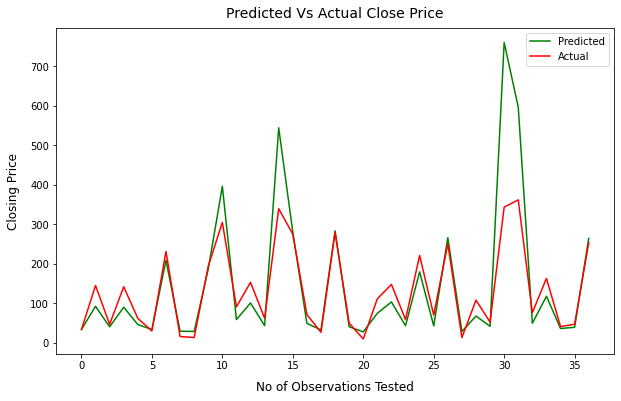

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Implementing Lasso Regression

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)  
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train,y_train)*100

80.90760725255433

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
y_pred_l

array([1.53327074, 1.96873214, 1.61216598, 1.95642773, 1.66647484,
       1.53271303, 2.32129421, 1.47267265, 1.46238383, 2.26567359,
       2.60077367, 1.77391691, 2.00517231, 1.64048415, 2.73888574,
       2.44275686, 1.69486866, 1.5160712 , 2.44724685, 1.61212774,
       1.445904  , 1.87443507, 2.01603464, 1.63755313, 2.25461975,
       1.63093738, 2.42667135, 1.46079383, 1.83247862, 1.62422451,
       2.87987075, 2.76652362, 1.69518593, 2.07299744, 1.56177874,
       1.59705995, 2.42315063])

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_l), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_l)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_l), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_l), 5))
print("r2 score :", round(r2_score(y_test, y_pred_l),5))

MSE score : 0.03191
RMSE score : 0.17863
MAE score : 0.14536
MAPE score : 0.08693
r2 score : 0.82871


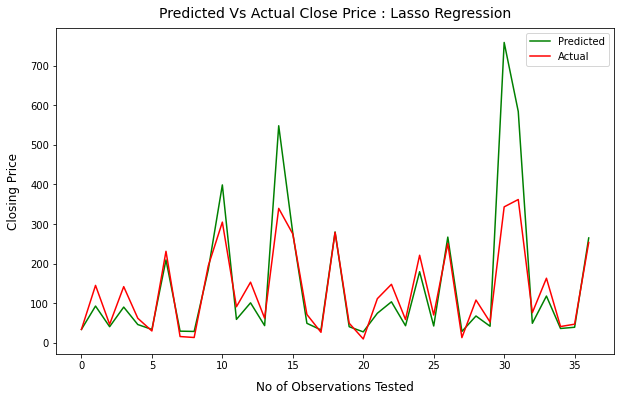

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_l),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Lasso Regression',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Cross Validation & Hyperparameter tuning of Lasso Regression

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.035688728899261


In [ ]:
# predicting 
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
y_pred_lasso

array([1.54344655, 1.97574886, 1.62792097, 1.95546498, 1.66658191,
       1.53734661, 2.31506742, 1.48294886, 1.47337939, 2.21706107,
       2.59857361, 1.786389  , 2.0046854 , 1.64806852, 2.73381171,
       2.39846747, 1.69903218, 1.52347191, 2.39776704, 1.61961931,
       1.45720363, 1.87045394, 2.01288734, 1.64002954, 2.24033887,
       1.61172638, 2.41816589, 1.47218926, 1.83490372, 1.63610595,
       2.84633038, 2.68723576, 1.69334389, 2.07296877, 1.56853742,
       1.60549805, 2.41089359])

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_lasso), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_lasso), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_lasso), 5))
print("r2 score :", round(r2_score(y_test, y_pred_lasso),5))

MSE score : 0.03152
RMSE score : 0.17755
MAE score : 0.14595
MAPE score : 0.08774
r2 score : 0.83078


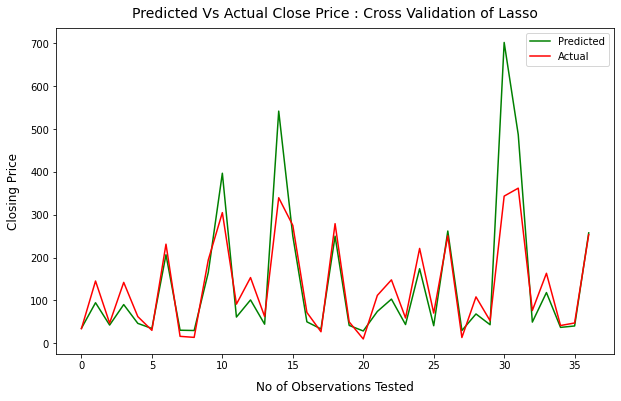

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Cross Validation of Lasso',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Implementing Ridge Regression

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train,y_train)*100

80.90642315192947

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
y_pred_r

array([1.5334622 , 1.96922127, 1.61250463, 1.95665066, 1.66639979,
       1.53267972, 2.32162939, 1.47283889, 1.46256774, 2.26399758,
       2.60150464, 1.77432706, 2.00545486, 1.64069108, 2.73980868,
       2.44149328, 1.69500926, 1.51615183, 2.44573491, 1.61227623,
       1.44606734, 1.8743713 , 2.01597983, 1.63755424, 2.25458459,
       1.62973976, 2.42679241, 1.46099548, 1.83266795, 1.62454272,
       2.87947192, 2.76400948, 1.69504053, 2.07329341, 1.56187277,
       1.5972619 , 2.42342024])

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_r), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_r)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_r), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_r), 5))
print("r2 score :", round(r2_score(y_test, y_pred_r),5))

MSE score : 0.03189
RMSE score : 0.17859
MAE score : 0.14528
MAPE score : 0.0869
r2 score : 0.82878


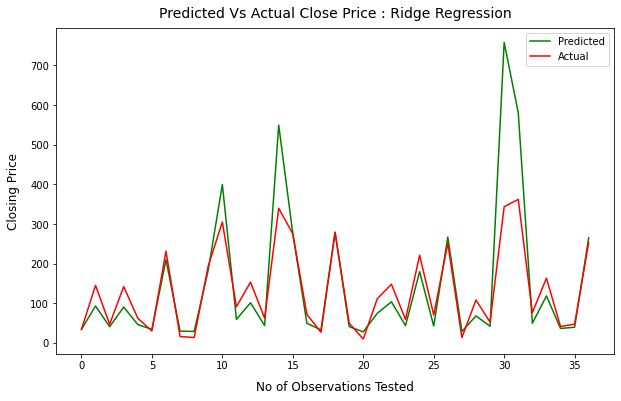

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_r),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Ridge Regression',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Cross Validation & Hyperparameter tuning of Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.035591064045074776


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
y_pred_ridge

array([1.53685109, 1.97890367, 1.62336467, 1.95852668, 1.66344078,
       1.53105213, 2.32657126, 1.47489651, 1.46506572, 2.23070238,
       2.61615325, 1.78538915, 2.00882057, 1.64391416, 2.75389879,
       2.41549977, 1.69619106, 1.51658252, 2.41536176, 1.61495446,
       1.44857737, 1.87222063, 2.01836956, 1.63608468, 2.25075001,
       1.61011666, 2.43301121, 1.46380564, 1.83524698, 1.63153741,
       2.8723522 , 2.71396422, 1.69102192, 2.07885344, 1.56271006,
       1.60032936, 2.42466269])

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_ridge), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_ridge), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 5))
print("r2 score :", round(r2_score(y_test, y_pred_ridge),5))

MSE score : 0.03171
RMSE score : 0.17808
MAE score : 0.14637
MAPE score : 0.08744
r2 score : 0.82976


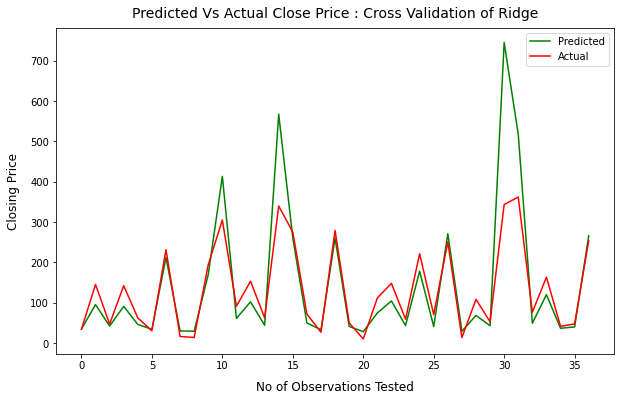

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Cross Validation of Ridge',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Implementing Elastic Net Regression

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)*100

78.67631296535167

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
y_pred_en

array([1.57821253, 1.95877279, 1.66246747, 1.93294061, 1.68007429,
       1.56910095, 2.2488902 , 1.52362346, 1.51568508, 2.14267329,
       2.50403119, 1.79883792, 1.9770972 , 1.66851515, 2.61542647,
       2.30377118, 1.71063839, 1.55799923, 2.30125173, 1.64426503,
       1.50218845, 1.85878264, 1.99144153, 1.65784124, 2.17658379,
       1.6298757 , 2.34692393, 1.51478462, 1.83031628, 1.66252591,
       2.70731868, 2.54151723, 1.70317981, 2.04048248, 1.59765644,
       1.63129602, 2.32676717])

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_en), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_en)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_en), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_en), 5))
print("r2 score :", round(r2_score(y_test, y_pred_en),5))

MSE score : 0.03436
RMSE score : 0.18537
MAE score : 0.15137
MAPE score : 0.09236
r2 score : 0.81555


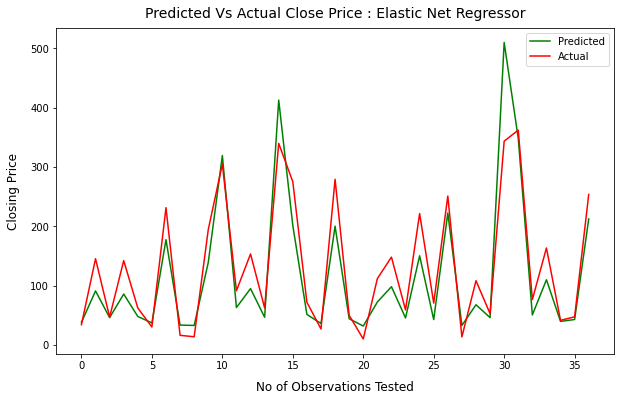

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_en),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Elastic Net Regressor',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Cross Validation & Hyperparameter tuning of Elastic Net Regression

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.035176857455740486


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
y_pred_elastic

array([1.53981924, 1.97789384, 1.62619228, 1.95700143, 1.66454946,
       1.53364021, 2.32156191, 1.47836527, 1.46867459, 2.22346746,
       2.60905078, 1.78654716, 2.00691477, 1.64576168, 2.74523429,
       2.40697321, 1.69731297, 1.51948847, 2.40647802, 1.6170668 ,
       1.45236609, 1.8712765 , 2.01642149, 1.63759912, 2.24573652,
       1.61049157, 2.42715514, 1.46745295, 1.83507555, 1.63386956,
       2.86079654, 2.700361  , 1.69176665, 2.07646422, 1.56518211,
       1.6026081 , 2.41827787])

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_elastic), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_elastic), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_elastic), 5))
print("r2 score :", round(r2_score(y_test, y_pred_elastic),5))

MSE score : 0.0316
RMSE score : 0.17775
MAE score : 0.14622
MAPE score : 0.08758
r2 score : 0.83039


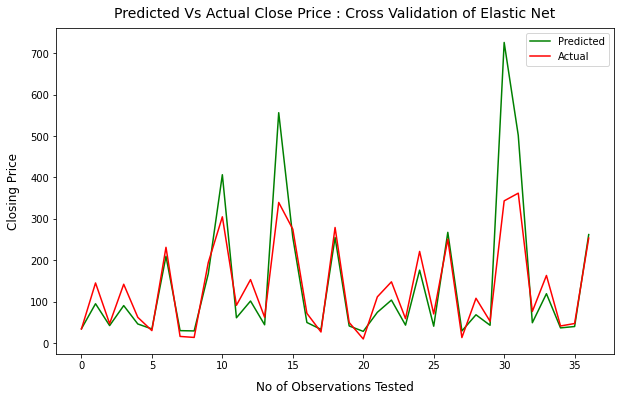

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_elastic),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Cross Validation of Elastic Net',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

### Implementing XGBoost Regressor

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgbr.score(X_train,y_train)*100

99.9984636264939

In [ ]:
y_pred_xgbr = xgbr.predict(X_test)

In [ ]:
y_pred_xgbr

array([1.515307 , 2.1618562, 1.6262724, 2.168585 , 1.8656046, 1.4794528,
       2.381939 , 1.2418078, 1.1193668, 2.3010423, 2.4872508, 1.9724711,
       2.159749 , 1.7735958, 2.5181534, 2.3734756, 1.860402 , 1.4470361,
       2.3750987, 1.7099537, 1.0293021, 2.1565812, 2.2164085, 1.7546195,
       2.414707 , 1.6069139, 2.4359183, 1.105359 , 2.031151 , 1.7433884,
       2.5456479, 2.5124536, 1.8559929, 2.231086 , 1.5955932, 1.7509024,
       2.4351583], dtype=float32)

In [ ]:
# accuracy on Test dataset
xgbr.score(X_test,y_test)*100

98.37748816650547

In [ ]:
print("MSE score :", round(mean_squared_error(y_test, y_pred_xgbr), 5))
print("RMSE score :", round(math.sqrt(mean_squared_error(y_test, y_pred_xgbr)), 5)) 
print("MAE score :", round(mean_absolute_error(y_test, y_pred_xgbr), 5))
print("MAPE score :", round(mean_absolute_percentage_error(y_test, y_pred_xgbr), 5))
print("r2 score :", round(r2_score(y_test, y_pred_xgbr),5))

MSE score : 0.00302
RMSE score : 0.05498
MAE score : 0.03526
MAPE score : 0.01882
r2 score : 0.98377


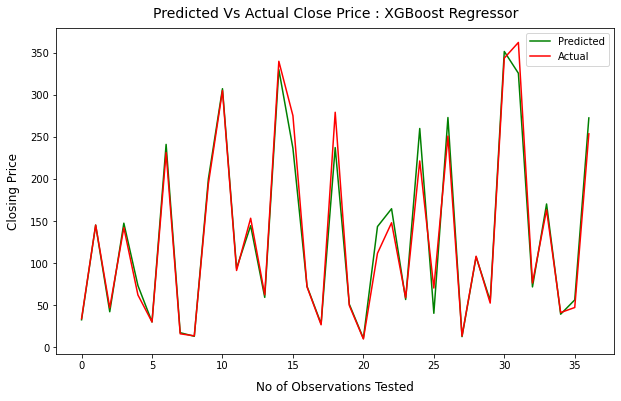

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_xgbr),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : XGBoost Regressor',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()

In [ ]:
# Function to calculate evaluation metrics of all implemented models in one go
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def model_score(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) 
    
    i = 0
    
# Iterating on all implemented models
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

# calculating evaluation metrics for each model
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=mean_absolute_error(y_test, y_pred_test)
        MSE=mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        R2_score=r2_score(y_test, y_pred_test)
        
        
# Storing all evaluated metirc in a dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"R2_score"]=round(R2_score,3)
        
        i+=1
    
# Sorting accuracy values in a descending order to sort by Best Performer Model to Worst Performing Model 
    df.sort_values(by=['R2_score'],ascending=False,inplace=True)
    
    return df

In [ ]:
# creating list of all the implemented ML models
models = [regressor,lasso,ridge,elasticnet,xgbr]

In [ ]:
# Performance of all implemented ML models in one data frame
final_performance_report=model_score(X_train,y_train,X_test,y_test)
final_performance_report

,Model_Name,MAE,MSE,RMSE,MAPE,R2_score
4,XGBRegressor,0.035,0.003,0.055,1.882,0.984
2,Ridge,0.146,0.032,0.178,8.744,0.830
0,LinearRegression,0.146,0.032,0.179,8.704,0.828
3,ElasticNet,0.151,0.034,0.185,9.236,0.816
1,Lasso,0.380,0.207,0.455,20.712,-0.113


# **Conclusion**

In this project,

1. Firstly we got the data of closing price prediction from yes bank in which we checked for duplicate as well as null values to make the analysis more accurate and convinient.

2. After that we found out the skewness of all independent variables as well as dependent variable to be highly left end. So for normalizing it, we have applied log10 transformation on all the variables and made them more stable for model building.

3. Then we went for checking the multicollinearity between independent variables, and after observing the highest values of multicollinearity we implemented variance inflation factor procedure to reduce it for making it more functional.

4. After performing all the exploratory data analysis we then applied z score to scale down the magnitude,and then  splitted the data into 80:20 ratio i.e. in 80% train data and 20% test data

5. After train_test_split, we implemented several regression ML models like linear regression , lasso regression, ridge regression, elastic net regression and performed cross validation & hyperparameter tuning of them. Also we implemented XGBoost Regressor to find model to compare among & to find out which is more accurate model with minimum error

The final result we concluded from this project is that , 

The XGBoost Regressor is the best performing ML model among all the other 4 implemented models to predict Closing Price of Yes Bank Stock with R2_score of 98% which take into consideration of all complexities present in the dataset

